In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import datetime

In [2]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('D:/MonHoc/Nam4/Ky1/TriTueNhanTao/CK/crawlutube.csv', encoding='utf-8-sig')

In [3]:
print(df.shape)
df.head(10)

(256, 10)


,Channel_name,Video_title,Views_x,Likes,Comments,Published_Date,Subscribes,Views_y,Total_videos,Description
0,YBS Youngbloods,Living On A Tree Tent In Crocodile Country,3012798,58226,1816,2023-09-24T10:00:19Z,6450000,1.864490e+09,424,"YBS is all about enjoying the ocean, nature an..."
1,YBS Youngbloods,Catching Giant Lobsters For Food On Remote Island,3975599,40785,1201,2023-09-03T10:00:10Z,6450000,1.864490e+09,424,"YBS is all about enjoying the ocean, nature an..."
2,YBS Youngbloods,Beautiful But Deadly..,12579644,592380,10378,2023-09-26T14:13:48Z,6450000,1.864490e+09,424,"YBS is all about enjoying the ocean, nature an..."
3,WWE,Kevin Owens will never trust Jey Uso,252777,21480,151,2023-09-19T01:20:44Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...
4,WWE,THE ROCK IS BACK ON SMACKDOWN!!!,1246328,122621,1727,2023-09-16T00:28:23Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...
5,WWE,That last line goes HARD 😤🔥🔥,1065795,72811,2071,2023-09-22T13:30:00Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...
6,WWE,LA Knight calls out Roman Reigns & Seth “Freak...,622046,52390,1122,2023-09-16T02:20:15Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...
7,WWE,Damian Priest is FED UP with JD McDonagh 😡,456964,24080,583,2023-09-26T01:22:04Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...
8,WWE,Austin Theory learned cheaters never win!,998038,57270,285,2023-09-14T21:00:25Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...
9,WWE,Carmelo let’s Ilja know he is NOT HIM 😤,162226,9531,114,2023-09-27T21:00:37Z,97600000,7.947960e+10,71936,WWE on YouTube is your number one spot to catc...


In [4]:
df.describe()

,Views_x,Likes,Comments,Subscribes,Views_y,Total_videos
count,2.560000e+02,2.560000e+02,256.000000,2.560000e+02,2.560000e+02,256.000000
mean,2.679011e+06,6.789960e+04,700.070312,3.751826e+07,2.677628e+10,11624.859375
std,8.324382e+06,2.866342e+05,2050.233084,3.571281e+07,3.472740e+10,20762.578265
min,1.209400e+04,0.000000e+00,0.000000,2.000000e+05,2.616497e+07,222.000000
25%,1.157828e+05,1.286750e+03,0.000000,1.190000e+07,6.133569e+09,1019.000000
50%,4.927250e+05,6.085500e+03,80.500000,2.710000e+07,1.573784e+10,2590.000000
75%,1.722360e+06,4.316875e+04,523.250000,4.090000e+07,3.416884e+10,10228.000000
max,8.476492e+07,3.783205e+06,23504.000000,1.660000e+08,1.703650e+11,71936.000000


In [5]:
# ... (Tiền xử lý dữ liệu của bạn ở đây) ...
total = df.isnull().sum().sort_values(ascending=False)
percent = (total/df.isnull().count()).sort_values(ascending=False)*100
dtype = df.dtypes
na_table = pd.concat([total,percent,dtype], axis=1, keys=['Total', '%', 'Dtype'])
na_table

,Total,%,Dtype
Channel_name,0,0.0,object
Video_title,0,0.0,object
Views_x,0,0.0,int64
Likes,0,0.0,int64
Comments,0,0.0,int64
Published_Date,0,0.0,object
Subscribes,0,0.0,int64
Views_y,0,0.0,float64
Total_videos,0,0.0,int64
Description,0,0.0,object


In [6]:
df['Published_Date'] = pd.to_datetime(df['Published_Date'], errors='coerce')
df['Published_Date'] = pd.to_datetime(df['Published_Date'].dt.date, format='%Y-%m-%d %H:%M:%S')
channel_data = df.loc[df['Channel_name'] == '5-Minute Crafts']
channel_data

,Channel_name,Video_title,Views_x,Likes,Comments,Published_Date,Subscribes,Views_y,Total_videos,Description
13,5-Minute Crafts,🤩 Bright Side Riddles game is here! Download a...,211441,4269,15,2023-09-25,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
14,5-Minute Crafts,Are you up for a challenge? 😉 Bright Side Ridd...,112079,3165,8,2023-09-20,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
15,5-Minute Crafts,Who will escape the prison? 😯 Download the Bri...,61239,2036,11,2023-09-18,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
16,5-Minute Crafts,Quick And Yummy Food Recipes That Will Save Yo...,306116,1553,50,2023-09-14,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
17,5-Minute Crafts,Jelly Watermelon Recipe 🍉 #shorts,741039,16542,82,2023-09-16,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
18,5-Minute Crafts,DIY Fun! Crafting an epic outdoor game with An...,111715,717,37,2023-09-25,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
19,5-Minute Crafts,Cool Pastry Ideas And Dough Recipes You Need T...,182758,535,25,2023-09-19,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
20,5-Minute Crafts,"Useful School Hacks 🤩😍 Study Smart, Not Hard W...",440506,1609,71,2023-09-18,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
21,5-Minute Crafts,Yummy Summer Food Recipes And Drink Ideas by 5...,302459,966,54,2023-09-06,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."
22,5-Minute Crafts,How To Make DIY Squishy Cat 😍😺 Best Hot Glue C...,73108,533,26,2023-09-18,80300000,2.664040e+10,6615,"Fun diy-projects, crafts, experience the joy o..."


In [7]:
df =df.drop(['Description'], axis = 1)

In [8]:
any_column_zero = (df == 0).any()
any_column_zero

Channel_name      False
Video_title       False
Views_x           False
Likes              True
Comments           True
Published_Date    False
Subscribes        False
Views_y           False
Total_videos      False
dtype: bool

In [9]:
for col in any_column_zero[any_column_zero].index:
    col_mean = df[col][df[col] != 0].mean()  # Tính giá trị trung bình của cột khác 0
    df[col] = df[col].replace(0, col_mean)   # Thay thế các giá trị 0 bằng giá trị trung bình
print(df.sample(n=20))

                                      Channel_name  \
66                                         Netflix   
39                                Lucas and Marcus   
163                                   Ryan's World   
58                                      Marshmello   
35                                Lucas and Marcus   
227                                       NBC News   
201          ChuChu TV Nursery Rhymes & Kids Songs   
51                                    Dude Perfect   
172  Little Baby Bum - Nursery Rhymes & Kids Songs   
153                                     D Billions   
111                                           FIFA   
68                                         Netflix   
106                                           FIFA   
140                                 LeoNata Family   
157                                   Ryan's World   
233                                       NBC News   
83                                    VanossGaming   
174  Little Baby Bum - Nurse

In [10]:
df.head()

,Channel_name,Video_title,Views_x,Likes,Comments,Published_Date,Subscribes,Views_y,Total_videos
0,YBS Youngbloods,Living On A Tree Tent In Crocodile Country,3012798,58226.0,1816.0,2023-09-24,6450000,1.864490e+09,424
1,YBS Youngbloods,Catching Giant Lobsters For Food On Remote Island,3975599,40785.0,1201.0,2023-09-03,6450000,1.864490e+09,424
2,YBS Youngbloods,Beautiful But Deadly..,12579644,592380.0,10378.0,2023-09-26,6450000,1.864490e+09,424
3,WWE,Kevin Owens will never trust Jey Uso,252777,21480.0,151.0,2023-09-19,97600000,7.947960e+10,71936
4,WWE,THE ROCK IS BACK ON SMACKDOWN!!!,1246328,122621.0,1727.0,2023-09-16,97600000,7.947960e+10,71936


In [11]:
# Tiền xử lý dữ liệu và chuẩn hóa

df['Published_Date'] = pd.to_datetime(df['Published_Date'])
# Lay ngay lon nhat + 1
current_date = max(df['Published_Date']) + datetime.timedelta(days=1)

df_youtuber = df.groupby(['Channel_name']).agg({
    'Published_Date': (lambda x: (x.max() - x.min()).days),
    'Video_title': 'count',
    'Views_x': 'sum'
})
df_youtuber.rename(columns={'Published_Date': 'TimeDiff', 'Video_title': 'Frequency', 'Views_x': 'ViewValue'}, inplace=True)
df_youtuber

,TimeDiff,Frequency,ViewValue
Channel_name,,,
5-Minute Crafts,19,10,2542460
AdventureArchives,11,2,85519
ChuChu TV Nursery Rhymes & Kids Songs,22,10,10496615
Cocomelon - Nursery Rhymes,28,10,122014259
D Billions,26,10,15618198
Daddy Yankee,15,5,219549
Dude Perfect,14,4,45535828
E! News,24,10,1235265
ESPN,20,10,86431678


In [12]:
# Chuyển đổi dữ liệu theo phân phối chuẩn
df_youtuber_t = pd.DataFrame()
df_youtuber_t['TimeDiff'] = stats.boxcox(df_youtuber['TimeDiff'])[0]
df_youtuber_t['Frequency'] = stats.boxcox(df_youtuber['Frequency'])[0]
df_youtuber_t['ViewValue'] = pd.Series(np.cbrt(df_youtuber['ViewValue'])).values


In [13]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_youtuber_t_scaled = scaler.fit_transform(df_youtuber_t)

In [14]:
def k_means(data, num_clusters, max_iterations=100):
    np.random.seed(42)
    # Sử dụng replace=True để cho phép chọn trùng lặp
    centroids = data[np.random.choice(data.shape[0], num_clusters, replace=True)]
    labels = assign_labels(data, centroids)
    
    for _ in range(max_iterations):
        new_centroids = update_centroids(data, labels, num_clusters)
        new_labels = assign_labels(data, new_centroids)

        # Kiểm tra xem các nhãn của các điểm dữ liệu có thay đổi hay không
        if np.array_equal(labels, new_labels):
            break

        centroids = new_centroids
        labels = new_labels

    return labels


# Hàm tính khoảng cách Euclidean giữa hai điểm
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Hàm gán nhãn cho từng điểm dữ liệu dựa trên centroids
def assign_labels(data, centroids):
    labels = []
    for i in range(len(data)):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        cluster_label = np.argmin(distances)
        labels.append(cluster_label)
    return np.array(labels)

# Hàm cập nhật centroids dựa trên các nhãn hiện tại
def update_centroids(data, labels, num_clusters):
    centroids = np.zeros((num_clusters, data.shape[1]))
    for cluster_label in range(num_clusters):
        cluster_data = data[labels == cluster_label]
        if len(cluster_data) > 0:
            centroids[cluster_label] = cluster_data.mean(axis=0)
    return centroids

In [15]:
# Số lượng cụm mong muốn
num_clusters = 4

# Gọi hàm K-means
cluster_labels = k_means(df_youtuber_t_scaled, num_clusters)

# Thêm nhãn nhóm vào DataFrame
df_youtuber['Cluster'] = cluster_labels

# In ra mẫu dữ liệu ngẫu nhiên kèm theo nhãn cụm
print(df_youtuber.sample(n=30))

                                               TimeDiff  Frequency  ViewValue  \
Channel_name                                                                    
LiveNOW from FOX                                     20         10    1873352   
NBC News                                             19         10   13179325   
VanossGaming                                         28         10   12926292   
Taylor Swift                                          6          2    1126047   
ESPN                                                 20         10   86431678   
Pinkfong Baby Shark - Kids' Songs & Stories          28         10   27541954   
Netflix                                              23         10   15524666   
Kids TV - Nursery Rhymes And Baby Songs              26         10   59518160   
Little Baby Bum - Nursery Rhymes & Kids Songs        23         10    1386306   
FIFA                                                 16         10    4503194   
5-Minute Crafts             

In [16]:
cluster_summary = df_youtuber.groupby('Cluster').agg(
    {
        'TimeDiff':'mean',
        'Frequency':'mean',
        'ViewValue':'mean'
    }
).round(2)

cluster_summary

,TimeDiff,Frequency,ViewValue
Cluster,,,
0,16.56,3.44,10053098.78
1,25.00,10.00,88129777.40
2,27.12,9.38,11040694.50
3,20.40,10.00,6637455.10


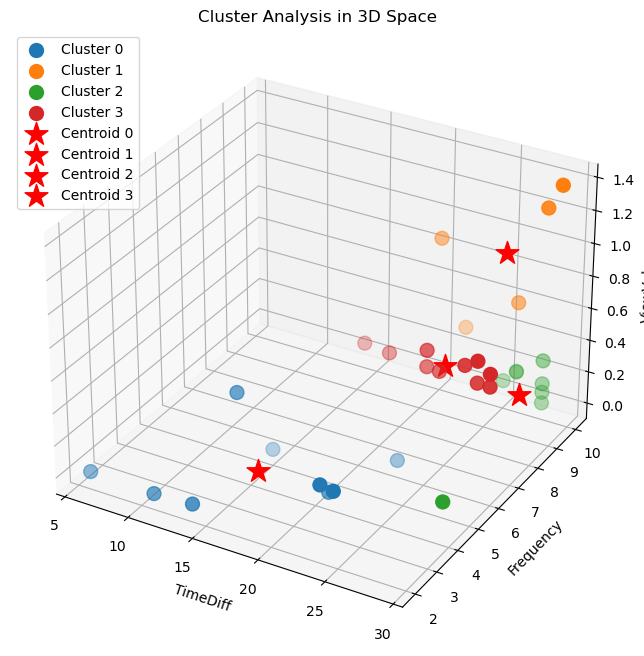

In [17]:
# Xác định tâm cụm
centroids = np.array([df_youtuber[df_youtuber['Cluster'] == i][['TimeDiff', 'Frequency', 'ViewValue']].mean().values for i in range(num_clusters)])

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các điểm dữ liệu
for cluster_label in range(num_clusters):
    cluster_data = df_youtuber[df_youtuber['Cluster'] == cluster_label]
    ax.scatter(cluster_data['TimeDiff'], cluster_data['Frequency'], cluster_data['ViewValue'], label=f'Cluster {cluster_label}', s=100)

# Vẽ tâm cụm dưới dạng hình ngôi sao
for centroid, cluster_label in zip(centroids, range(num_clusters)):
    ax.scatter(centroid[0], centroid[1], centroid[2], c='red', marker='*', s=300, label=f'Centroid {cluster_label}')

ax.set_xlabel('TimeDiff')
ax.set_ylabel('Frequency')
ax.set_zlabel('ViewValue')
ax.set_title('Cluster Analysis in 3D Space')
ax.legend()

plt.show()


In [19]:
from datetime import datetime

def predict_cluster(time_diff, frequency, view_value, scaler, centroids):
    time_diff = datetime.strptime(time_diff, '%d/%m/%y')
    new_data = pd.DataFrame({'TimeDiff': [(time_diff - current_date).days], 'Frequency': [frequency], 'ViewValue': [view_value]})
    new_data_scaled = scaler.transform(new_data)

    cluster_label = k_means(new_data_scaled, num_clusters, max_iterations=100)[0]

    return cluster_label

# Nhập dữ liệu từ người dùng
new_time_diff = input("Nhập ngày tháng (dd/mm/yy): ")
new_frequency = float(input("Nhập Frequency: "))
new_view_value = float(input("Nhập ViewValue: "))

# Dự đoán cụm cho dữ liệu nhập từ người dùng
predicted_cluster = predict_cluster(new_time_diff, new_frequency, new_view_value, scaler, centroids)

print(f"Cụm dự đoán cho dữ liệu nhập là: {predicted_cluster}")
